In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math

# Read data from mesa data: 
a = pd.read_excel('ONe6040_helm_update.xlsx')

In [2]:
r_cm = np.array(a["radius_cm"])
rho = np.power(10,np.array(a["logRho"]))
temp = np.array(a["temperature"])
pressure = np.array(a['pressure'])

In [3]:
data = pd.DataFrame(columns = ['r_center [cm]'],data = r_cm[::-1])
data['density [g/cm3]'] = rho[::-1]
data['temperature [K]'] = temp[::-1]
data['pressure'] = pressure[::-1]
data['neon20'] = np.array(a['ne20'])[::-1]
data['oxygen16'] =  np.array(a['o16'])[::-1]
data['oxygen20'] =  np.array(a['o20'])[::-1]
data['magnesium24'] =  np.array(a['mg24'])[::-1]
data['fluorine20'] =  np.array(a['f20'])[::-1]
data['helium4'] =  np.array(a['he4'])[::-1]
data['aluminum27'] = 0.0
data['silicon28'] =  np.array(a['si28'])[::-1]
data['sulfur32'] = 0.0
data['phosphorus31'] = 0.0
data['hydrogen1'] =  np.array(a['h1'])[::-1]

In [4]:
data.head(3)

,r_center [cm],density [g/cm3],temperature [K],pressure,neon20,oxygen16,oxygen20,magnesium24,fluorine20,helium4,aluminum27,silicon28,sulfur32,phosphorus31,hydrogen1
0,4226.946083,8.348568e+09,6.565855e+08,7.367388e+27,0.007297,0.599994,0.392705,4.964879e-16,2.021100e-09,8.924793e-23,0.0,0.000004,0.0,0.0,0.0
1,4384.531853,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,0.392705,4.964889e-16,2.021100e-09,8.924807e-23,0.0,0.000004,0.0,0.0,0.0
2,4459.320035,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,0.392705,4.964890e-16,2.021100e-09,8.924809e-23,0.0,0.000004,0.0,0.0,0.0


In [5]:
length = data.shape[0]
length

1901

In [6]:
df = data[data['temperature [K]']>7.8e8]
dff = data[data['temperature [K]']>8.5e8]

In [7]:
df['temp'] = df['temperature [K]']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
df_max = df[df['temperature [K]'] == max(df['temperature [K]'])]

In [9]:
r0 = float(df_max['r_center [cm]'])

In [10]:
df['temp'] = max(df['temperature [K]'])*np.exp(-(df['r_center [cm]']-r0)**2/5200000000000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
dn = pd.DataFrame(data = [0]*data.shape[0], columns=['temp'])

index1 = 539
index2 = 741
dn.temp[index1:index2] = df[(df.index>(index1-1)) & (df.index<index2)]['temp']
dn.temp[0:index1] = data['temperature [K]'][0:index1]
dn.temp[index2:length] = data['temperature [K]'][index2:length]

In [12]:
data['temperature [K]'] = dn['temp']

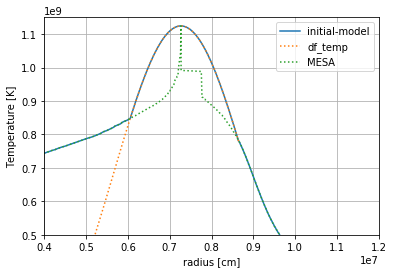

In [13]:
plt.plot(data['r_center [cm]'],data['temperature [K]'],label='initial-model')
#plt.plot(df['r_center [cm]'],df['temperature [K]'],':',label='df')
plt.plot(df['r_center [cm]'],df['temp'],':',label='df_temp')
#plt.plot(data['r_center [cm]'],dn['temp'],'o:',label='dn')
plt.plot(r_cm,temp,":",label="MESA")
plt.xlim(4e6,12e6)
plt.ylim(5.e8,11.5e8)
plt.grid()
plt.xlabel("radius [cm]")
plt.ylabel("Temperature [K]")
plt.legend()
plt.savefig("temperature.png")

In [14]:
dn.temp[539] = 8.8e+08
dn.temp[538] = 8.66e+08
dn.temp[537] = 8.51e+08
dn.temp[536] = 8.4e+08

data['temperature [K]'] = dn['temp']

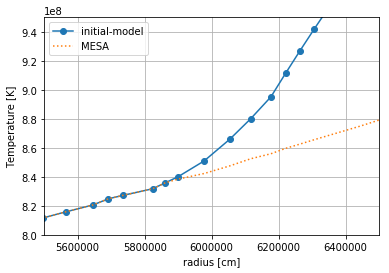

In [15]:
plt.plot(data['r_center [cm]'],data['temperature [K]'],"o-",label='initial-model')
#plt.plot(df['r_center [cm]'],df['temperature [K]'],':',label='df')
#plt.plot(df['r_center [cm]'],df['temp'],':',label='df_temp')
#plt.plot(data['r_center [cm]'],dn['temp'],'o:',label='dn')
plt.plot(r_cm,temp,":",label="MESA")
plt.xlim(5.5e6,6.5e6)
plt.ylim(8.e8,9.5e8)
plt.grid()
plt.xlabel("radius [cm]")
plt.ylabel("Temperature [K]")
plt.legend()
plt.savefig("temperature.png")

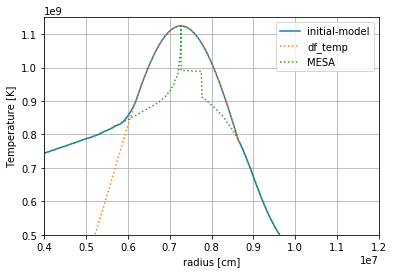

In [16]:
plt.plot(data['r_center [cm]'],data['temperature [K]'],label='initial-model')
#plt.plot(df['r_center [cm]'],df['temperature [K]'],':',label='df')
plt.plot(df['r_center [cm]'],df['temp'],':',label='df_temp')
#plt.plot(data['r_center [cm]'],dn['temp'],'o:',label='dn')
plt.plot(r_cm,temp,":",label="MESA")
plt.xlim(4e6,12e6)
plt.ylim(5.e8,11.5e8)
plt.grid()
plt.xlabel("radius [cm]")
plt.ylabel("Temperature [K]")
plt.legend()
plt.savefig("temperature.png")

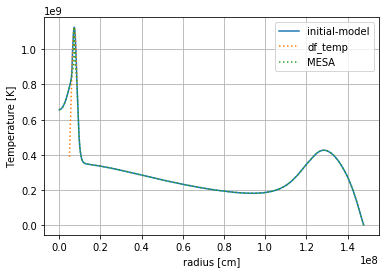

In [17]:
plt.plot(data['r_center [cm]'],data['temperature [K]'],label='initial-model')
#plt.plot(df['r_center [cm]'],df['temperature [K]'],':',label='df')
plt.plot(df['r_center [cm]'],df['temp'],':',label='df_temp')
#plt.plot(data['r_center [cm]'],dn['temp'],'o:',label='dn')
plt.plot(r_cm,temp,":",label="MESA")
#plt.xlim(4e6,12e6)
#plt.ylim(5.e8,11.5e8)
plt.grid()
plt.xlabel("radius [cm]")
plt.ylabel("Temperature [K]")
plt.legend()
plt.savefig("temperature.png")

In [18]:
y = np.array(dff['density [g/cm3]'][46:150])
x = np.array(dff['r_center [cm]'][46:150])
x1 = x[0]
x2 = x[-1]
y1 = y[0]
y2 = y[-1]
y = (y1-y2)/(x1-x2)*(x-x2)+y2
data['density [g/cm3]'][585:689] = y

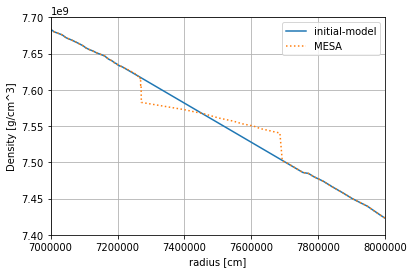

In [19]:
plt.plot(data['r_center [cm]'],data['density [g/cm3]'],'-',label='initial-model')
#plt.plot(df['r_center [cm]'],df['density [g/cm3]'],":",label="df")
#plt.plot(x,y,label='y')
plt.plot(r_cm,rho,":",label="MESA")
plt.xlim(7.e6,8.e6)
plt.ylim(7.4e9,7.7e9)
plt.grid()
plt.xlabel("radius [cm]")
plt.ylabel("Density [g/cm^3]")
plt.legend()
plt.savefig("Density.png")

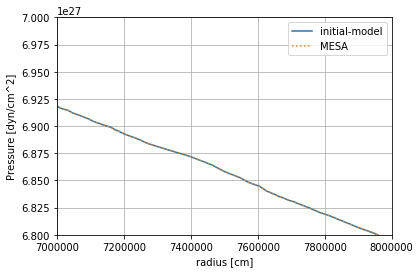

In [20]:
plt.plot(data['r_center [cm]'],data['pressure'],label="initial-model")
plt.plot(r_cm,pressure,":",label="MESA")
plt.xlim(7e6,8.e6)
plt.ylim(6.8e27,7.0e27)
plt.grid()
plt.xlabel("radius [cm]")
plt.ylabel("Pressure [dyn/cm^2]")
plt.legend()

In [21]:
def phi(x):
    'Cumulative distribution function for the standard normal distribution'
    r = []
    for item in x:
        r.append((1.0 + math.erf((item-r0) / np.sqrt(5200000000000.0))) / 5.0)
    return r

In [22]:
data['neon20'] = phi(data['r_center [cm]'])

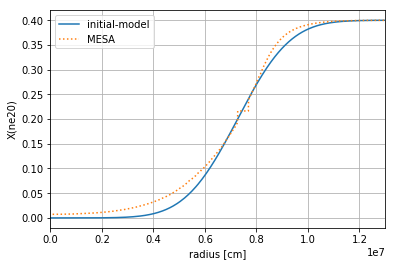

In [23]:
plt.plot(data['r_center [cm]'],data['neon20'],"-",label='initial-model')
#plt.plot(df['r_center [cm]'],df['neon20'],":",label="df")
#plt.plot(x,y,label='y')
plt.plot(r_cm,np.array(a['ne20']),":",label="MESA")
plt.plot()
plt.grid()
plt.xlim(0,13e6)
#plt.ylim(0.15,0.3)
plt.xlabel("radius [cm]")
plt.ylabel("X(ne20)")
plt.legend()
plt.savefig("X(ne20).png")

In [24]:
def phii(x):
    'Cumulative distribution function for the standard normal distribution'
    r = []
    for item in x:
        r.append(0.4+(1.0 + math.erf((item-r0) / np.sqrt(5200000000000.0))) / (-5.0))
    return r

In [25]:
data['oxygen20'] = phii(data['r_center [cm]'])

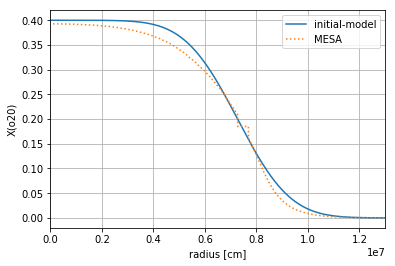

In [26]:
plt.plot(data['r_center [cm]'],data['oxygen20'],"-",label='initial-model')
#plt.plot(df['r_center [cm]'],df['oxygen20'],":",label="df")
#plt.plot(x,y,label='y')
plt.plot(r_cm,np.array(a['o20']),":",label="MESA")
plt.plot()
plt.grid()
plt.xlim(0,13e6)
#plt.ylim(0.11,0.25)
plt.xlabel("radius [cm]")
plt.ylabel("X(o20)")
plt.legend()
plt.savefig("X(o20).png")

In [27]:
data['silicon28'] = max(data['silicon28'])*np.exp(-(data['r_center [cm]']-r0)**2/5200000000000)

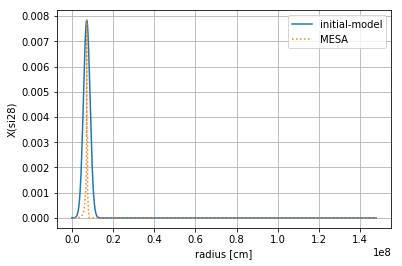

In [28]:
plt.plot(data['r_center [cm]'],data['silicon28'],"-",label="initial-model")
#plt.plot(df['r_center [cm]'],df['si'],"-",label="df")
plt.plot(r_cm,np.array(a['si28']),":",label="MESA")
#plt.xlim(6.3e6,6.8e6)
#plt.xlim(8.e6,8.5e6)
#plt.xlim(3.e6,12.5e6)
#plt.ylim(0,0.004)
plt.xlabel("radius [cm]")
plt.ylabel("X(si28)")
plt.grid()
plt.legend()
plt.savefig("X(si28).png")

In [29]:
data['helium4'] = max(data['helium4'])*np.exp(-(data['r_center [cm]']-r0)**2/5200000000000)

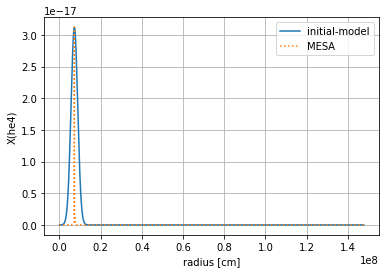

In [30]:
plt.plot(data['r_center [cm]'],data['helium4'],'-',label="initial-model")
#plt.plot(df['r_center [cm]'],df['he'],"-",label="df")
plt.plot(r_cm,np.array(a['he4']),":",label="MESA")
plt.grid()
#plt.xlim(6e6,8.5e6)
#plt.ylim(2e-20,14e-20)
plt.xlabel("radius [cm]")
plt.ylabel("X(he4)")
plt.legend()
plt.savefig("X(he4).png")

In [31]:
data['magnesium24'] = max(data['magnesium24'])*np.exp(-(data['r_center [cm]']-r0)**2/5200000000000)

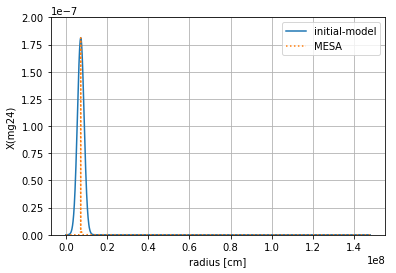

In [32]:
plt.plot(data['r_center [cm]'],data['magnesium24'],'-',label="initial-model")
#plt.plot(df['r_center [cm]'],df['mg'],"-",label="df")
plt.plot(r_cm,np.array(a['mg24']),":",label="MESA")
plt.grid()
#plt.xlim(6e6,8.5e6)
plt.ylim(0,2e-7)
plt.xlabel("radius [cm]")
plt.ylabel("X(mg24)")
plt.legend()
plt.savefig("X(mg24).png")

In [33]:
data['fluorine20'] = max(data['fluorine20'])*np.exp(-(data['r_center [cm]']-r0)**2/5200000000000)

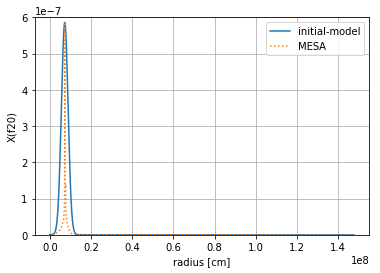

In [34]:
plt.plot(data['r_center [cm]'],data['fluorine20'],'-',label="initial-model")
#plt.plot(df['r_center [cm]'],df['f'],"-",label="df")
plt.plot(r_cm,np.array(a['f20']),":",label="MESA")
plt.grid()
#plt.xlim(6.0e6,8.5e6)
plt.ylim(0,6e-7)
plt.xlabel("radius [cm]")
plt.ylabel("X(f20)")
plt.legend()
plt.savefig("X(f20).png")

In [35]:
data['hydrogen1'] = max(data['hydrogen1'])*np.exp(-(data['r_center [cm]']-r0)**2/5200000000000)

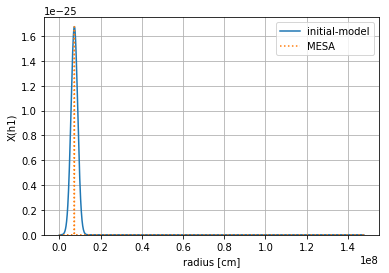

In [36]:
plt.plot(data['r_center [cm]'],data['hydrogen1'],'-',label="initial-model")
#plt.plot(df1['r_center [cm]'],df1['h'],"-o",label="df1")
plt.plot(r_cm,np.array(a['h1']),":",label="MESA")
plt.grid()
#plt.xlim(5.0e6,9.5e6)
plt.ylim(0.9e-30,1.75e-25)
plt.xlabel("radius [cm]")
plt.ylabel("X(h1)")
plt.legend()
plt.savefig("X(h1).png")

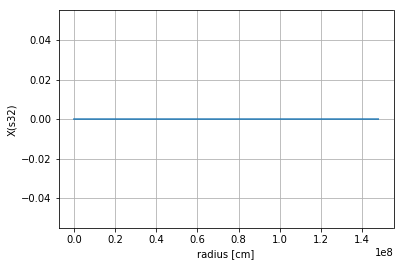

In [37]:
plt.plot(data['r_center [cm]'],data['sulfur32'])
plt.xlabel("radius [cm]")
plt.ylabel("X(s32)")
plt.grid()

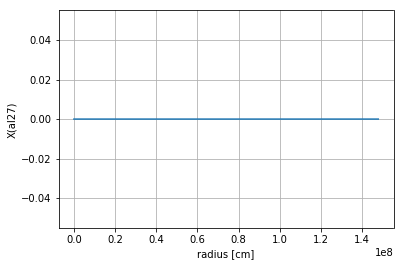

In [38]:
plt.plot(data['r_center [cm]'],data['aluminum27'])
plt.xlabel("radius [cm]")
plt.ylabel("X(al27)")
plt.grid()

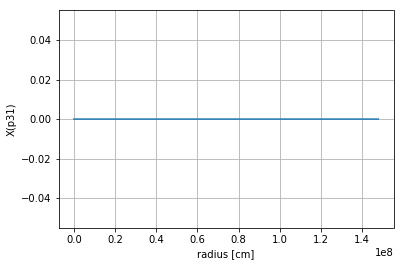

In [39]:
plt.plot(data['r_center [cm]'],data['phosphorus31'])
plt.xlabel("radius [cm]")
plt.ylabel("X(p31)")
plt.grid()

In [47]:
mm = min(data['oxygen16'])*np.exp(-(data['r_center [cm]']-r0)**2/5200000000000)

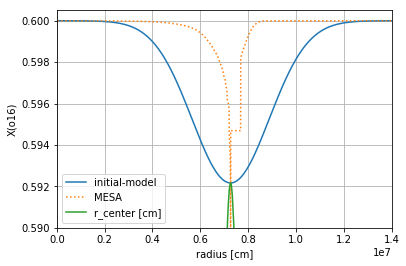

In [48]:
data.oxygen16 = 1-data.hydrogen1-data.helium4-data.oxygen20-data.fluorine20-data.neon20-data.magnesium24-data.aluminum27-data.silicon28-data.phosphorus31-data.sulfur32

plt.plot(data['r_center [cm]'],data['oxygen16'],label="initial-model")
plt.plot(r_cm,np.array(a['o16']),":",label="MESA")
plt.plot(data['r_center [cm]'],mm)
plt.xlim(0e6,14e6)
plt.ylim(0.590,0.6005)
plt.grid()
plt.xlabel("radius [cm]")
plt.ylabel("X(o16)")
plt.legend()
plt.savefig("X(o16).png")